In [2]:
from typing import Sequence
import numpy as np
import pandas as pd
from keras.models import Sequential
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [7]:
columnas_incorrectosdf = pd.read_csv("D:/InteligenciaArtificial3/dataset_imagenes/columna_incorrectos.txt")
columnas_correctosdf = pd.read_csv("D:/InteligenciaArtificial3/dataset_imagenes/columna_correctos.txt")
extension_incorrectosdf = pd.read_csv("D:/InteligenciaArtificial3/dataset_imagenes/extension_incorrectos.txt")
extension_correctosdf = pd.read_csv("D:/InteligenciaArtificial3/dataset_imagenes/extension_correctos.txt")

print("el tamaño de :",len(columnas_incorrectosdf))
print("el tamaño de :",len(columnas_correctosdf))
print("el tamaño de :",len(extension_incorrectosdf))
print("el tamaño de :",len(extension_correctosdf))

X = []
y = []
no_of_timesteps = 30

datasets = columnas_incorrectosdf.iloc[:,1:].values
n_samples = len(datasets)
for i in range(no_of_timesteps, n_samples):
    X.append(datasets[i-no_of_timesteps:i,:])
    y.append(0)

datasets = columnas_correctosdf.iloc[:,1:].values
n_samples = len(datasets)
#print(n_samples)
for i in range(no_of_timesteps, n_samples):
    X.append(datasets[i-no_of_timesteps:i,:])
    y.append(1)

datasets = extension_incorrectosdf.iloc[:,1:].values
n_samples = len(datasets)
for i in range(no_of_timesteps, n_samples):
    X.append(datasets[i-no_of_timesteps:i,:])
    y.append(2)

datasets = extension_correctosdf.iloc[:,1:].values
n_samples = len(datasets)
#print(n_samples)
for i in range(no_of_timesteps, n_samples):
    X.append(datasets[i-no_of_timesteps:i,:])
    y.append(3)

X, y = np.array(X), np.array(y)
print("Total de Datos",len(X),len(y))
print(X.shape, y.shape)

# Dividir los datos en conjunto de entrenamiento+validación y conjunto de prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Dividir los datos restantes en conjunto de entrenamiento y conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)  # 0.25 x 0.8 = 0.2

# Imprimir las formas de los conjuntos resultantes
print("entrenamiento shape:", X_train.shape)
print("validacion shape:", X_val.shape)
print("prueba shape:", X_test.shape)

el tamaño de : 8307
el tamaño de : 8846
el tamaño de : 8623
el tamaño de : 8191
Total de Datos 33847 33847
(33847, 30, 34) (33847,)
entrenamiento shape: (25892, 30, 34)
validacion shape: (4570, 30, 34)
prueba shape: (3385, 30, 34)


In [8]:
print(len(X_train))
print(y_train.shape)
print(X_test.shape)

25892
(25892,)
(3385, 30, 34)


In [9]:
model3 = Sequential()
model3.add(LSTM(units=64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, input_shape=(X.shape[1], X.shape[2])))
model3.add(Dropout(0.2))
model3.add(LSTM(units=128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dropout(0.2))
model3.add(LSTM(units=64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=4, activation='softmax'))
model3.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\USUARIO\anaconda3\envs\IA_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
810/810 ━━━━━━━━━━━━━━━━━━━━ 55s 53ms/step - accuracy: 0.4145 - loss: 1.2985 - val_accuracy: 0.7114 - val_loss: 0.5830 - learning_rate: 0.0010
Epoch 2/120
810/810 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.6603 - loss: 0.7656 - val_accuracy: 0.8206 - val_loss: 0.4535 - learning_rate: 0.0010
Epoch 3/120
810/810 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.7336 - loss: 0.6540 - val_accuracy: 0.8394 - val_loss: 0.3956 - learning_rate: 0.0010
Epoch 4/120
810/810 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.7591 - loss: 0.5885 - val_accuracy: 0.8735 - val_loss: 0.3291 - learning_rate: 0.0010
Epoch 5/120
810/810 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.7994 - loss: 0.5256 - val_accuracy: 0.8258 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 6/120
810/810 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.8205 - loss: 0.4675 - val_accuracy: 0.9201 - val_loss: 0.2202 - learning_rate: 0.0010
Epoch 7/120
810/810 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.8

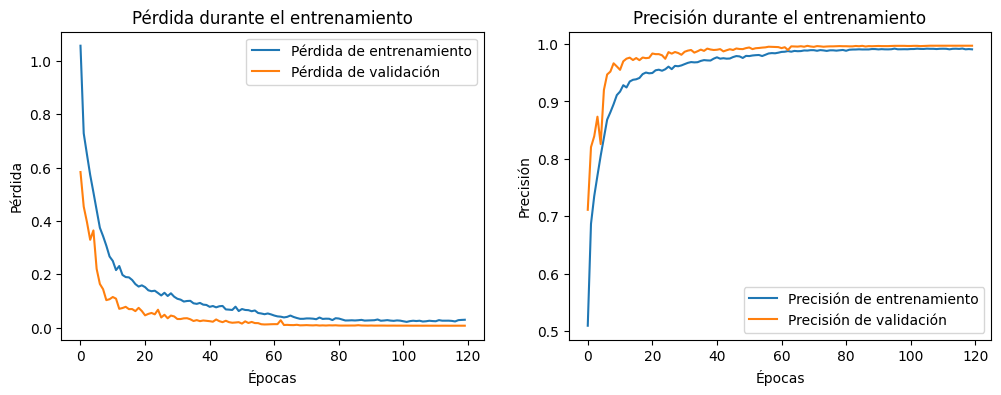

In [10]:
import matplotlib.pyplot as plt

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

history = model3.fit(X_train, y_train, epochs=120, batch_size=32, callbacks=callbacks, validation_data=(X_val, y_val))

# Graficar la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

In [11]:
evaluation = model3.evaluate(X_test, y_test)
print("Resultado de la evaluación:")
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9959 - loss: 0.0081
Resultado de la evaluación:
Loss: 0.007073940709233284
Accuracy: 0.9964549541473389


In [12]:
model3.save("D:/InteligenciaArtificial3/Modelos/pruebas_multi/lstm4-model4pm.h5")

In [13]:
from keras.models import load_model

# Cargar el modelo
loaded_model = load_model("D:/InteligenciaArtificial3/Modelos/pruebas_multi/lstm4-model4pm.h5")

# Verificar que el modelo se ha cargado correctamente
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        25,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,198 (703.90 KB)

 Trainable params: 180,068 (703.39 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 2 (12.00 B)

143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step


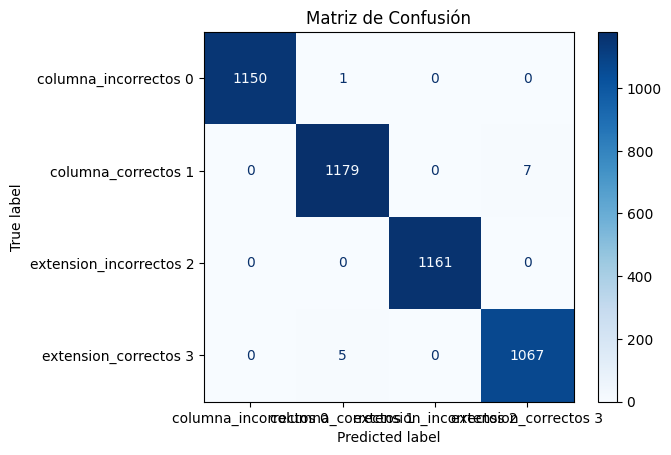

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,multilabel_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Suponiendo que tienes los nombres de las clases en una lista
class_names = ['columna_incorrectos 0', 'columna_correctos 1', 'extension_incorrectos 2', 'extension_correctos 3']  # Reemplaza con los nombres de tus clases

# Paso 1: Realizar predicciones
y_pred = loaded_model.predict(X_val)

# Paso 2: Convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Paso 3: Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Paso 4: Graficar la matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriz de Confusión')
plt.show()


143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step


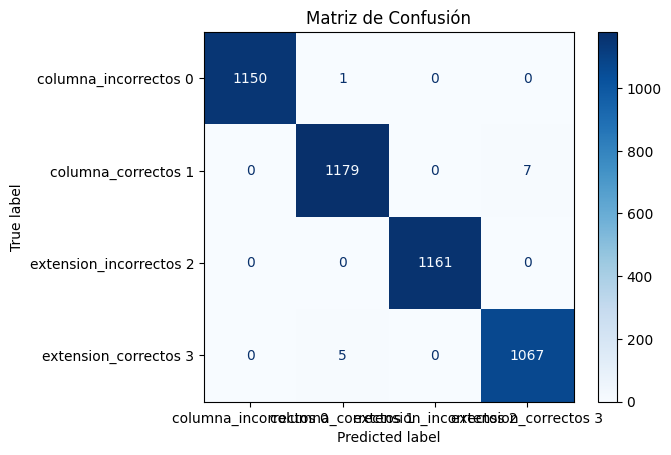

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,multilabel_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Suponiendo que tienes los nombres de las clases en una lista
class_names = ['columna_incorrectos 0', 'columna_correctos 1', 'extension_incorrectos 2', 'extension_correctos 3']  # Reemplaza con los nombres de tus clases

# Paso 1: Realizar predicciones
y_pred = model3.predict(X_val)

# Paso 2: Convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Paso 3: Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Paso 4: Graficar la matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriz de Confusión')
plt.show()


143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Métricas de Evaluación:



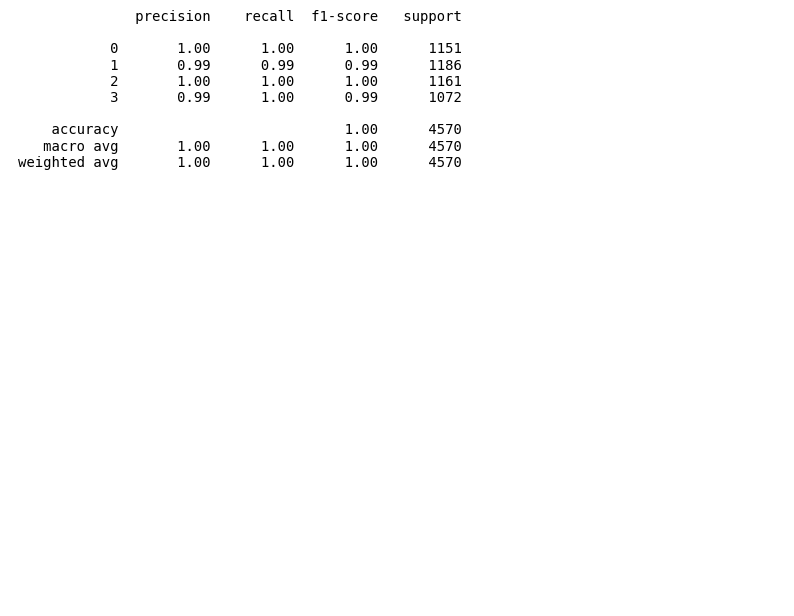

In [16]:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Paso 1: Realizar predicciones
y_pred = model3.predict(X_val)

# Paso 2: Convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Paso 3: Obtener el reporte de clasificación
report = classification_report(y_val, y_pred_classes)

# Paso 4: Imprimir el reporte de clasificación
print("Métricas de Evaluación:\n")
#print(report)

# Si deseas mostrar el reporte en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.text(0.01, 1.1, str(report), {'fontsize': 10}, fontproperties='monospace') 
plt.axis('off')
plt.show()


143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Matriz de Confusión:
[[1150    1    0    0]
 [   0 1179    0    7]
 [   0    0 1161    0]
 [   0    5    0 1067]]
Tasa de Falsos Positivos para Clase 0 (FPR): 0.0
Tasa de Falsos Positivos para Clase 1 (FPR): 0.0017730496453900709
Tasa de Falsos Positivos para Clase 2 (FPR): 0.0
Tasa de Falsos Positivos para Clase 3 (FPR): 0.002001143510577473


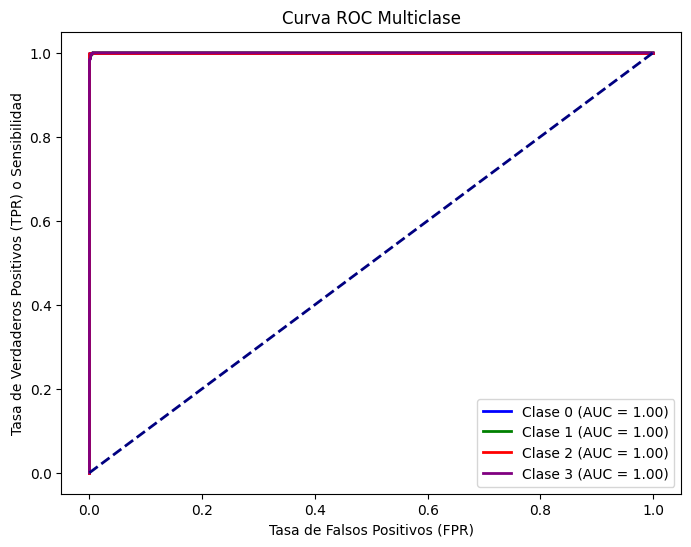

Precisión por clase: [1.         0.99493671 1.         0.99348231]
Recall por clase: [0.99913119 0.99409781 1.         0.99533582]
F-Score por clase: [0.99956541 0.99451708 1.         0.9944082 ]
Precisión promedio (macro): 0.9971047544963817
Recall promedio (macro): 0.9971412047305052
F-Score promedio (macro): 0.9971226722625184


In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt

# Predicciones del modelo
y_pred = model3.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones como etiquetas de clase

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Tasa de Falsos Positivos (FPR) por clase
fpr_dict = {}
for i in range(len(conf_matrix)):
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    fpr_dict[f"Clase {i}"] = fp / (fp + tn)
    print(f"Tasa de Falsos Positivos para Clase {i} (FPR): {fpr_dict[f'Clase {i}']}")

# Curva ROC y AUC por clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_val == i, y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_val == i, y_pred[:, i])

# Plotear las curvas ROC para cada clase
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Clase %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) o Sensibilidad')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")
plt.show()

# Precisión, Recall y F-Score para cada clase y promedio
precision = precision_score(y_val, y_pred_classes, average=None)
recall = recall_score(y_val, y_pred_classes, average=None)
f_score = f1_score(y_val, y_pred_classes, average=None)

print("Precisión por clase:", precision)
print("Recall por clase:", recall)
print("F-Score por clase:", f_score)

# Métricas promedio
precision_avg = precision_score(y_val, y_pred_classes, average='macro')
recall_avg = recall_score(y_val, y_pred_classes, average='macro')
f_score_avg = f1_score(y_val, y_pred_classes, average='macro')

print("Precisión promedio (macro):", precision_avg)
print("Recall promedio (macro):", recall_avg)
print("F-Score promedio (macro):", f_score_avg)


In [18]:
print(X_test.shape)

(3385, 30, 34)


In [15]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción
y_probs = model3.predict(X_test)

# Calcular la curva precision-recall y el área bajo la curva (AUC)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
auc_score = auc(recall, precision)

# Graficar la curva F1-confidence
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-confidence Curve')
plt.legend()
plt.grid(True)
plt.show()

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


ValueError: multiclass format is not supported

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(X_test)
# Convertir las probabilidades continuas en clases binarias usando umbral de 0.5
y_pred_bin = (loaded_model.predict(X_test) > 0.5).astype("int32")
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_bin)
print("Matriz de Confusión:")
#print(conf_matrix)
# Definir etiquetas para los ejes
labels = ["Negativo (0)", "Positivo (1)"]

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajustar el tamaño de fuente para mejor legibilidad
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()
# Calcular otras métricas de evaluación
report = classification_report(y_test, y_pred_bin)

# Mostrar las métricas de evaluación
print("\nMétricas de Evaluación:")
print(report)